# 0. Installation (one time job)

In [1]:
# !pip install scikit-learn==0.23.1
# !pip install pandas
# !pip install matplotlib

# 1. Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree, export_graphviz # Visualize Tree / Rules

# 2. Import ASD Data

In [3]:
# Loading the dataset
# ASD_data = pd.read_csv('./data.csv')
# ASD_data = pd.read_csv('./Toddler Autism dataset.csv')
ASD_data=pd.read_csv("../input/autism-screening-for-toddlers/Toddler Autism dataset July 2018.csv")

# Print the first 5 rows of the dataframe.
ASD_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
# Replace special 
ASD_data.columns=ASD_data.columns.str.replace('-','_')
ASD_data.columns=ASD_data.columns.str.replace('/','_')
ASD_data.columns=ASD_data.columns.str.replace(' ','_')
ASD_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class_ASD_Traits_
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
# observing the shape of the data
print(ASD_data.shape)

(1054, 19)


# 3. Data Preprocessing

## 3.1. Choose appropriate features 

In [6]:
Sex = pd.Categorical(ASD_data['Sex']).codes
Ethnicity = pd.Categorical(ASD_data['Ethnicity']).codes
Jaundice = pd.Categorical(ASD_data['Jaundice']).codes
Family_mem_with_ASD = pd.Categorical(ASD_data['Family_mem_with_ASD']).codes
Class_ASD_Traits_ = pd.Categorical(ASD_data['Class_ASD_Traits_']).codes

ASD_data['Sex'] = Sex
ASD_data['Ethnicity'] = Ethnicity
ASD_data['Jaundice'] = Jaundice
ASD_data['Family_mem_with_ASD'] = Family_mem_with_ASD
ASD_data['Class_ASD_Traits_'] = Class_ASD_Traits_

# Check the data and think why we drop these variables?
# X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Score', 'ASD_Traits', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'], axis=1)
X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score', 'Class_ASD_Traits_'], axis=1)


In [7]:
X.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD'],
      dtype='object')

## 3.2 Choose target

In [8]:
Y_classification = ASD_data.Class_ASD_Traits_
Y_regression = ASD_data.Qchat_10_Score

# 4. Build Classification Tree

## 4.1 Split the dataset into training set and test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 3, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

(702, 15)
(352, 15)


In [10]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
723,1,1,0,0,0,1,1,1,0,1,23,1,5,1,1
492,1,0,0,1,1,0,1,0,1,1,28,1,5,1,0
990,1,0,1,1,1,1,1,0,1,1,35,0,8,0,0
836,1,1,1,1,1,1,1,1,1,1,29,1,5,0,0
317,0,1,0,1,0,1,1,1,1,1,16,1,8,1,1


In [11]:
y_train.head()

723    1
492    1
990    1
836    1
317    1
Name: Class_ASD_Traits_, dtype: int8

## 4.2 Build classification tree

In [12]:
dt = DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
dt

Accuracy on training set: 1.000
Accuracy on test set: 0.923


DecisionTreeClassifier(random_state=0)

## 4.3. Use grid search to optimize the parameters

In [13]:

best_para = {'max_depth':0, 'min_samples':0}
best_test_acc = 0

# grid serach
for max_depth in range(1, 20):
    for min_samples in range(2,100):
        dt = DecisionTreeClassifier(criterion='gini',max_depth=max_depth, min_samples_split = min_samples, random_state=0)
        dt.fit(X_train, y_train)
        if dt.score(X_test, y_test) > best_test_acc:
            best_test_acc = dt.score(X_test, y_test)
            best_para['max_depth'] = max_depth
            best_para['min_samples'] = min_samples

dt = DecisionTreeClassifier(criterion='gini',max_depth=best_para['max_depth'], min_samples_split = best_para['min_samples'], random_state=0)
dt.fit(X_train, y_train)
print("Best accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Best accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
print("Best decision tree with parameter max_depth of {0} and min_samples_split of {1}".format(best_para['max_depth'], best_para['min_samples']))

Best accuracy on training set: 0.990
Best accuracy on test set: 0.923
Best decision tree with parameter max_depth of 8 and min_samples_split of 2


# 5. Build Regression Tree

## 5.1 Split the dataset into training set and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_regression, test_size=1 / 3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(702, 15)
(352, 15)


## 5.2 Build regreesion tree

In [15]:
dt = DecisionTreeRegressor(criterion='mse',random_state=0)
dt.fit(X_train, y_train)


print("Score on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(dt.score(X_test, y_test)))

Score on training set: 1.000
Score on test set: 0.924


## 5.3. Use grid search to optimize the parameters

In [16]:
best_para = {'max_depth':0, 'min_samples':0}
best_test_acc = 0
# grid serach
for max_depth in range(1, 4):
    for min_samples in range(2,50):
        dt = DecisionTreeRegressor(criterion='mse',max_depth=max_depth, min_samples_split = min_samples, random_state=0)
        dt.fit(X_train, y_train)
        if dt.score(X_test, y_test) > best_test_acc:
            best_test_acc = dt.score(X_test, y_test)
            best_para['max_depth'] = max_depth
            best_para['min_samples'] = min_samples

dt = DecisionTreeRegressor(criterion='mse',max_depth=best_para['max_depth'], min_samples_split = best_para['min_samples'], random_state=0)
dt.fit(X_train, y_train)
print("Best score on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Best score on test set: {:.3f}".format(dt.score(X_test, y_test)))
print("Best regression tree with parameter max_depth of {0} and min_samples_split of {1}".format(best_para['max_depth'], best_para['min_samples']))


Best score on training set: 0.764
Best score on test set: 0.762
Best regression tree with parameter max_depth of 3 and min_samples_split of 2


# 6. Extract all the rules (Decsion Tree's level = 8) from the classification tree

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

[Text(167.4, 190.26, 'X[5] <= 0.5\nmse = 8.231\nsamples = 702\nvalue = 5.229'),
 Text(83.7, 135.9, 'X[6] <= 0.5\nmse = 4.506\nsamples = 300\nvalue = 3.027'),
 Text(41.85, 81.53999999999999, 'X[4] <= 0.5\nmse = 2.082\nsamples = 155\nvalue = 1.755'),
 Text(20.925, 27.180000000000007, 'mse = 1.441\nsamples = 130\nvalue = 1.408'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 1.526\nsamples = 25\nvalue = 3.56'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 0.5\nmse = 3.52\nsamples = 145\nvalue = 4.386'),
 Text(104.625, 27.180000000000007, 'mse = 2.478\nsamples = 107\nvalue = 3.729'),
 Text(146.475, 27.180000000000007, 'mse = 1.812\nsamples = 38\nvalue = 6.237'),
 Text(251.10000000000002, 135.9, 'X[3] <= 0.5\nmse = 4.688\nsamples = 402\nvalue = 6.873'),
 Text(209.25, 81.53999999999999, 'X[4] <= 0.5\nmse = 2.992\nsamples = 129\nvalue = 5.016'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 2.562\nsamples = 58\nvalue = 3.914'),
 Text(230.175, 27.180000000000007, 'mse = 

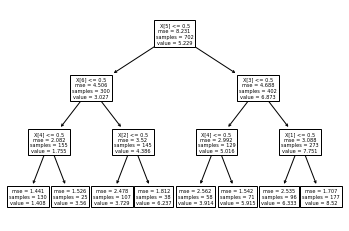

In [17]:
###################################################################
# Extract all the rules from the classification tree
###################################################################
plot_tree(dt) 

### Useful Tips:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 3, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

dt = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=3)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
dt

(702, 15)
(352, 15)
Accuracy on training set: 0.879
Accuracy on test set: 0.838


DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(669.6, 570.7800000000001, 'X[6] <= 0.5\ngini = 0.427\nsamples = 702\nvalue = [217, 485]'),
 Text(334.8, 407.70000000000005, 'X[8] <= 0.5\ngini = 0.434\nsamples = 254\nvalue = [173, 81]'),
 Text(167.4, 244.62, 'X[1] <= 0.5\ngini = 0.274\nsamples = 195\nvalue = [163, 32]'),
 Text(83.7, 81.53999999999996, 'gini = 0.133\nsamples = 154\nvalue = [143, 11]'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.5\nsamples = 41\nvalue = [20, 21]'),
 Text(502.20000000000005, 244.62, 'X[5] <= 0.5\ngini = 0.282\nsamples = 59\nvalue = [10, 49]'),
 Text(418.5, 81.53999999999996, 'gini = 0.494\nsamples = 18\nvalue = [8, 10]'),
 Text(585.9, 81.53999999999996, 'gini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(1004.4000000000001, 407.70000000000005, 'X[8] <= 0.5\ngini = 0.177\nsamples = 448\nvalue = [44, 404]'),
 Text(837.0, 244.62, 'X[1] <= 0.5\ngini = 0.38\nsamples = 157\nvalue = [40, 117]'),
 Text(753.3000000000001, 81.53999999999996, 'gini = 0.489\nsamples = 89\nvalue = [38, 51]'),
 Tex

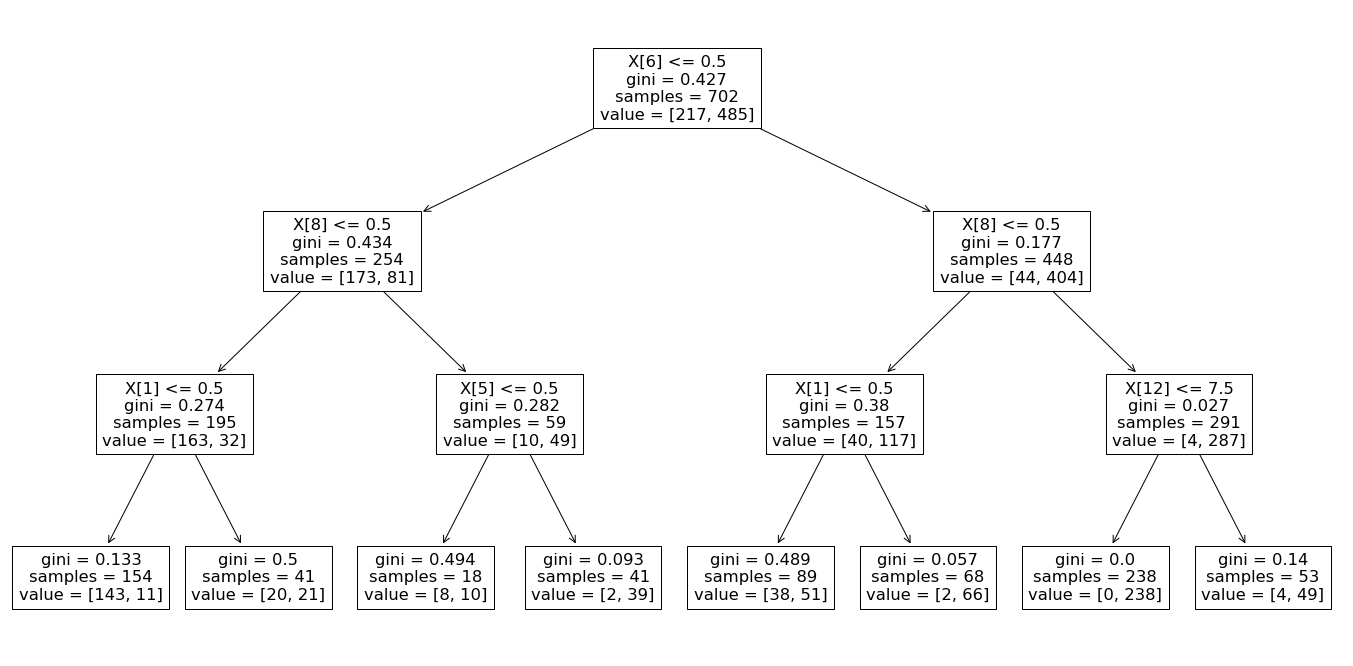

In [24]:
plt.rcParams['figure.figsize'] = [24, 12] # Optionally adjust inline graph size
plot_tree(dt) 

### install graphviz

In [20]:
# !pip install graphviz

Also in Linux terminal: sudo apt install graphviz

In [21]:
import graphviz 
dot_data = export_graphviz(dt, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['Not ASD', 'ASD'], # "0": Not ASD ; "1": ASD
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph
graph.render("tree_rules_image", view=True)
f = open("tree_rules.txt","w+")
f.write(dot_data)
f.close()

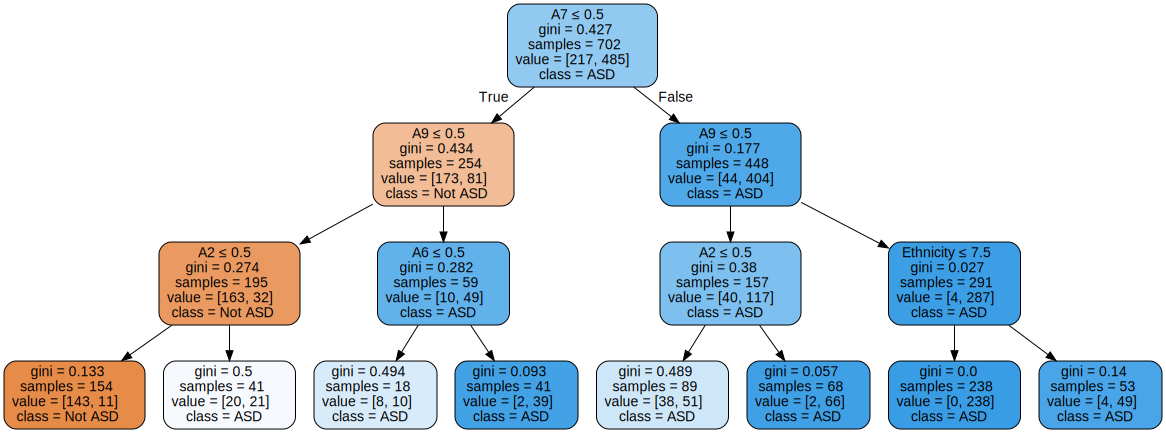

In [22]:
from graphviz import Source

Source.from_file('tree_rules_image')


---
`The end is called new start.` --- ISS **I** **S**(elf) **S**(tudy)